# Importing Packages and Data

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('display.float_format', lambda x: '%.2f' % x)
data = pd.read_csv('kc_house_data.csv')

# Data Analysis and Exploring

In [31]:
# all columnns have an adequate data type except the date column
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [32]:
# a few statistics about the data to understand it
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [33]:
# there is no NaN values in the dataframe
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

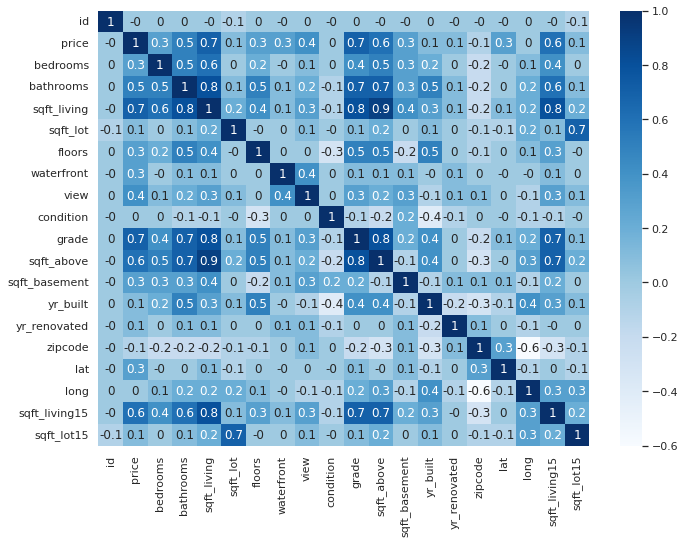

In [34]:
# matrix representig the correlation between all the variables
corr = data.corr().round(1)
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

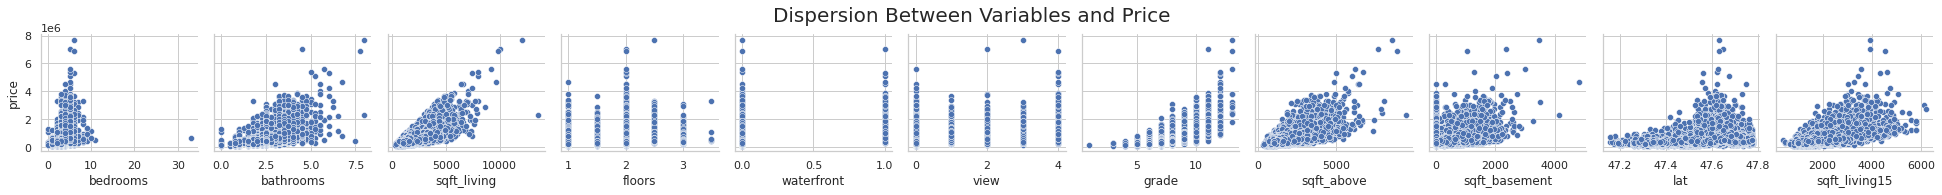

In [35]:
# dispersion between the price and all the other varables that have some kind of correlation with the price
ax = sns.pairplot(data, y_vars='price', x_vars=['bedrooms', 'bathrooms','sqft_living','floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'])
ax.fig.suptitle('Dispersion Between Variables and Price', fontsize=20, y=1.05)
ax

# Data Manipulation and New Features and Dataframes Creation

In [36]:
# creating new features
data['sqft_price'] = data['price'] / data['sqft_living']
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
data['built_1955'] = data['yr_built'].apply(lambda x: 'after' if x >= 1955 else 'before')
data['is_waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')
data['renovated'] = data['yr_renovated'].apply(lambda x: 'yes' if x > 0 else 'no')
data['season'] = data['date'].apply(lambda x: 'spring' if 3 <= x.month <= 5 else 'summer' if 6 <= x.month <= 8 else 'autumn' if 9 <= x.month <= 11 else 'winter')

In [38]:
# creating a new dataframe that contains only the houses to buy
data_median = data[['zipcode', 'sqft_price']].groupby('zipcode').median().reset_index()
data_median.rename(columns={'sqft_price':'median_sqft_price'}, inplace=True)
df = pd.merge(data[['id', 'date', 'season','price', 'condition', 'zipcode', 'sqft_price']], data_median, on='zipcode', how='left')
df['status'] = df[['sqft_price', 'median_sqft_price', 'condition']].apply(lambda x: 'buy' if x.sqft_price < x.median_sqft_price and x.condition >= 3 else 'not buy', axis=1)
df_buy = df.query("status == 'buy'")

In [39]:
# setting the price at which houses should be sold
df_buy_median = df_buy[['zipcode', 'season', 'sqft_price']].groupby(['zipcode', 'season']).median().reset_index()
df_buy_median.rename(columns={'sqft_price':'median_sqft_price_sell'}, inplace=True)
df_sell = pd.merge(df_buy, df_buy_median, on=['zipcode', 'season'], how='left')
df_sell['sell_price'] = df_sell[['price', 'sqft_price', 'median_sqft_price_sell']].apply(lambda x: x.price * 1.3 if x.sqft_price < x.median_sqft_price_sell else x.price * 1.1, axis = 1)

# Checking if a Few Hypothesis are True or False

H1: Houses that have some kind of river, lake or sea in front of them are at least 30% more expensive than the others that don't have water in front of them.

In [40]:
h1 = data[['price', 'is_waterfront']].groupby('is_waterfront').mean().reset_index()
percentage = (h1.query("is_waterfront == 'yes'").iloc[0]['price'] / h1.query("is_waterfront == 'no'").iloc[0]['price'] * 100) - 100
print("{:.2f}%".format(percentage))

212.64%


- True: Houses that have some kind of river, lake or sea in front of them are 212,64% more expensive.

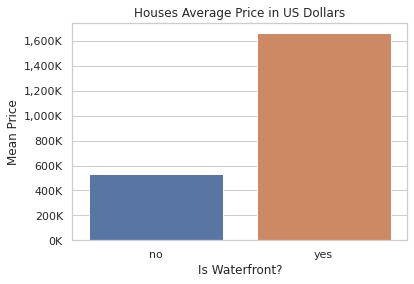

In [41]:
sns.set_theme(style="whitegrid")
fig = sns.barplot(data=h1, x='is_waterfront', y='price')
fig.set(title='Houses Average Price in US Dollars', xlabel='Is Waterfront?', ylabel='Mean Price')
fig.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

H2: Huses built before 1955 are 50% cheaper.

In [42]:
h2 = data[['price', 'built_1955']].groupby('built_1955').mean().reset_index()
percentage = (h2.query("built_1955 == 'before'").iloc[0]['price'] / h2.query("built_1955 == 'after'").iloc[0]['price'] * 100) - 100
print("{:.2f}%".format(percentage))

-0.78%


 - False: The price of the houses that were built before and after 1955 are almost the same.

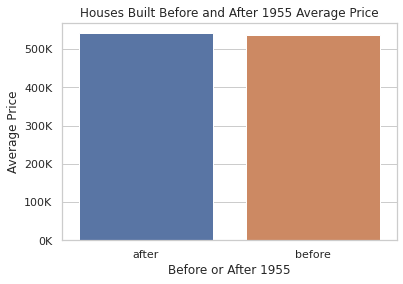

In [46]:
sns.set_theme(style="whitegrid")
fig = sns.barplot(data=h2, x='built_1955', y='price')
fig.set(title='Houses Built Before and After 1955 Average Price', xlabel='Before or After 1955', ylabel='Average Price')
fig.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))


H3: The average price of the houses are greater in the summer than all other seasons by 10%.

In [47]:
h3 = data[['price', 'season']].groupby('season').mean().reset_index()
percentage = (h3.query("season == 'summer'").iloc[0]['price'] / h3.query("season == 'spring'").iloc[0]['price'] * 100) - 100
print("{:.2f}%".format(percentage))

-1.05%


- False: The average price of the houses during the spring are greater than the summer.

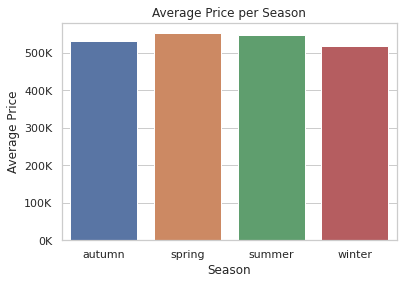

In [49]:
sns.set_theme(style="whitegrid")
fig = sns.barplot(data=h3, x='season', y='price')
fig.set(title='Average Price per Season', xlabel='Season', ylabel='Average Price')
fig.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

H4: The average price increased by 10% from 2014 to 2015.

In [50]:
h4 = data[['price', 'year']].groupby('year').mean().reset_index()
percentage = (h4.query("year == 2015").iloc[0]['price'] / h4.query("year == 2014").iloc[0]['price'] * 100) - 100
print("{:.2f}%".format(percentage))

0.52%


- False: The mean price of the houses is almost the same in the two years considered.

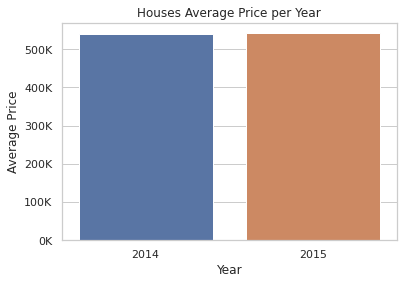

In [52]:
sns.set_theme(style="whitegrid")
fig = sns.barplot(data=h4, x='year', y='price')
fig.set(title='Houses Average Price per Year', xlabel='Year', ylabel='Average Price')
fig.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))


H5: The difference between the lowest and highest value between the average price for the months is greater than 10 % of the maximum value.

In [53]:
h5 = data[['price', 'month']].groupby('month').mean().reset_index()
percentage = (h5['price'].min() / h5['price'].max() * 100) - 100
print("{:.2f}%".format(percentage))

-9.61%


 - False: The average price from april is a little bit less than 10% greater than the average price in february.

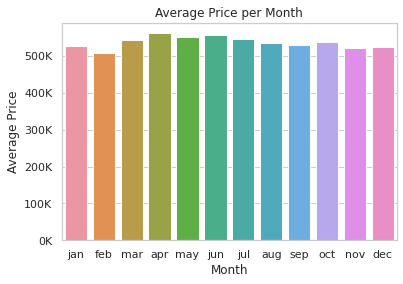

In [59]:
sns.set_theme(style="whitegrid")
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',  'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig = sns.barplot(data=h5, x='month', y='price', order=months)
fig.set(title='Average Price per Month', xlabel='Month', ylabel='Average Price')
fig.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

H6: Houses that were never renovated are at least 20% cheaper.

In [55]:
h6 = data[['price', 'renovated']].groupby('renovated').mean().reset_index()
percentage = (h6.query("renovated == 'no'").iloc[0]['price'] / h6.query("renovated == 'yes'").iloc[0]['price'] * 100) - 100
print("{:.2f}%".format(percentage))

-30.25%


- True: Houses that were never renovated are 30% cheaper than the others that were renovated.

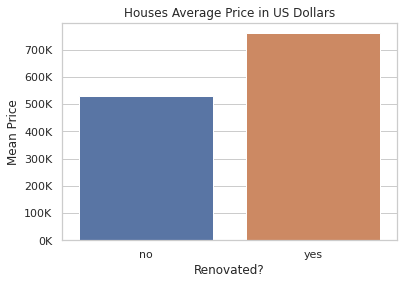

In [57]:
sns.set_theme(style="whitegrid")
fig = sns.barplot(data=h6, x='renovated', y='price')
fig.set(title='Houses Average Price in US Dollars', xlabel='Renovated?', ylabel='Mean Price')
fig.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))